# **Background and Understanding**

**Context**

California adalah sebuah negara bagian di Amerika Serikat dengan jumlah penduduk sekitar 40 juta dan merupakan negara bagian Amerika Serikat yang terpadat berdasarkan kepadatan penduduk dan terbesar ketiga berdasarkan wilayah. 

Perekonomian yang maju dan tingkat kepadatan populasi California mengakibatkan California menjadi salah satu kota dengan market properti yang paling mahal dan kompetitif di Amerika Serikat. Pertumbuhan jumlah masyarakat, luas tanah yang terbatas, dan permintaan yang tinggi membuat harga rumah di California meroket. Harga rumah di California sangat tinggi dan sulit dijangkau bagi sebagian besar penduduk. Banyak orang yang ingin membeli rumah, tetapi sulit menemukan yang terjangkau dan kualitasnya baik. Hal ini membuat banyak orang berpotensi tidak memiliki tempat tinggal yang layak.

**Problem Statement**

Dengan pengetahuan context diatas, terjadilah permasalahan dimana ada orang menyewa/menjual propertinya dengan harga tak wajar, ataupun tidak tahu berapa nilai properti seharusnya yang dapat ia jual, selain dari itu juga sebagai pemerintah harus dapat mengontrol harga-harga properti untuk menghindari harga properti yang tidak masuk akal, atau pecahnya gelembung properti seperti pada tahun 2008 di Amerika serikat, ataupun 1980 di Jepang.

Secara singkat, **sangatlah penting untuk mencari ambang keseimbangan harga properti di California secara objektif, adil dan akurat**

**Goals**

Untuk mencari keseimbangan harga properti dengan pendekatan machine learning untuk harga kedepan di California, untuk kesejahteraan warga California dan mencegah harga properti yang tidak dapat dijangkau

**Analytic Approach**

Sebelum kita dapat membangun machine learning untuk properti California, kita harus menganalisa pola-pola rumah yang ada di pasar sekarang(luas tanah, jumlah ruangan, dll). 
Setelah kita mendapatkan pola yang kita inginkan, maka model regresi lah yang kita pilih dan bangun dari data yang sudah ada.

**Metric Evaluation**

Kita akan menggunakan RMSE, MAE, dan MAPE, di mana:
- RMSE: Real Mean Squared error, adalah nilai rata-rata akar kuadrat dari error 
- MAE: Mean Absolute Error, adalah rata-rata nilai absolut dari error
- MAPE: Mean Absolute Percentage Error, sama seperti MAE namun dalam bentuk persentase error yang dihasilkan oleh model regresi. 

Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga properti sesuai dengan limitasi fitur yang digunakan. 

# **Data Cleansing and understanding**

# **Data Attributes**

Data berikut merupakan dataset California Housing pada tahun 1990

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| longitude | Integer | A measure of how far west a house is; a higher value is farther west |
| latitude | Integer | A measure of how far north a house is; a higher value is farther north |
| housing_median_age | Integer | Median age of a house within a block; a lower number is a newer building |
| total_rooms | Integer | Total number of rooms within a block |
| total_bedrooms | Integer | Total number of bedrooms within a block |
| population | Integer | Total number of people residing within a block |
| households | Integer | Total number of households, a group of people residing within a home unit, for a block |
| median_income| Integer | Median income for households within a block of houses (measured in tens of thousands of US Dollars) |
| ocean_proximity | Object | Location of the house with respect to ocean/sea |
| median_house_value | Integer | median house value in US dollars |


Sebelum kita dapat melanjutkan pada tahap Machine Learning, kita harus melakukan data cleaning terdahulu agar model machine learning kita bisa berjalan dengan tepat.

Ingat, Garbage in Garbage out.

# **Data Cleansing**

In [1]:
import pandas as pd
df= pd.read_csv('data_california_house.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [3]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

Karena yang kosong hanya 137 dan data kita ada 14000 lebih, kita drop saja biar g pusing (~0.9% dari data)

In [4]:
df[df['total_bedrooms'].isna()]
df.dropna(inplace=True)

df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [5]:
df.duplicated().sum()

0

Dengan ini kita dengan pasti, kita mengetahui bahwa data kita sudah bersih, tidak ada NaN dan duplikasi data, selanjutnya kita dapat mengevaluasi model kita, namun kita harus mengevaluasi Data numerik terlebih dahulu

# **Data Numerikal**

In [6]:
import matplotlib.pyplot as plt
import seaborn as sea

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000
mean,-119.567150,35.631365,28.609671,2640.917686,538.260709,1424.772273,499.480470,3.866774,206793.156942
std,2.006374,2.139589,12.606493,2197.192896,423.577544,1151.795857,383.826005,1.890866,115404.371629
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1452.000000,295.000000,784.000000,279.000000,2.569400,119400.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1164.000000,410.000000,3.540300,180000.000000
75%,-118.000000,37.715000,37.000000,3142.000000,647.000000,1722.000000,603.500000,4.736100,263750.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Check Outliers**

Kita akan mengecek outlier pada setiap kategori lebih lanjut kecuali longtitude, latitude dan ocean proximity

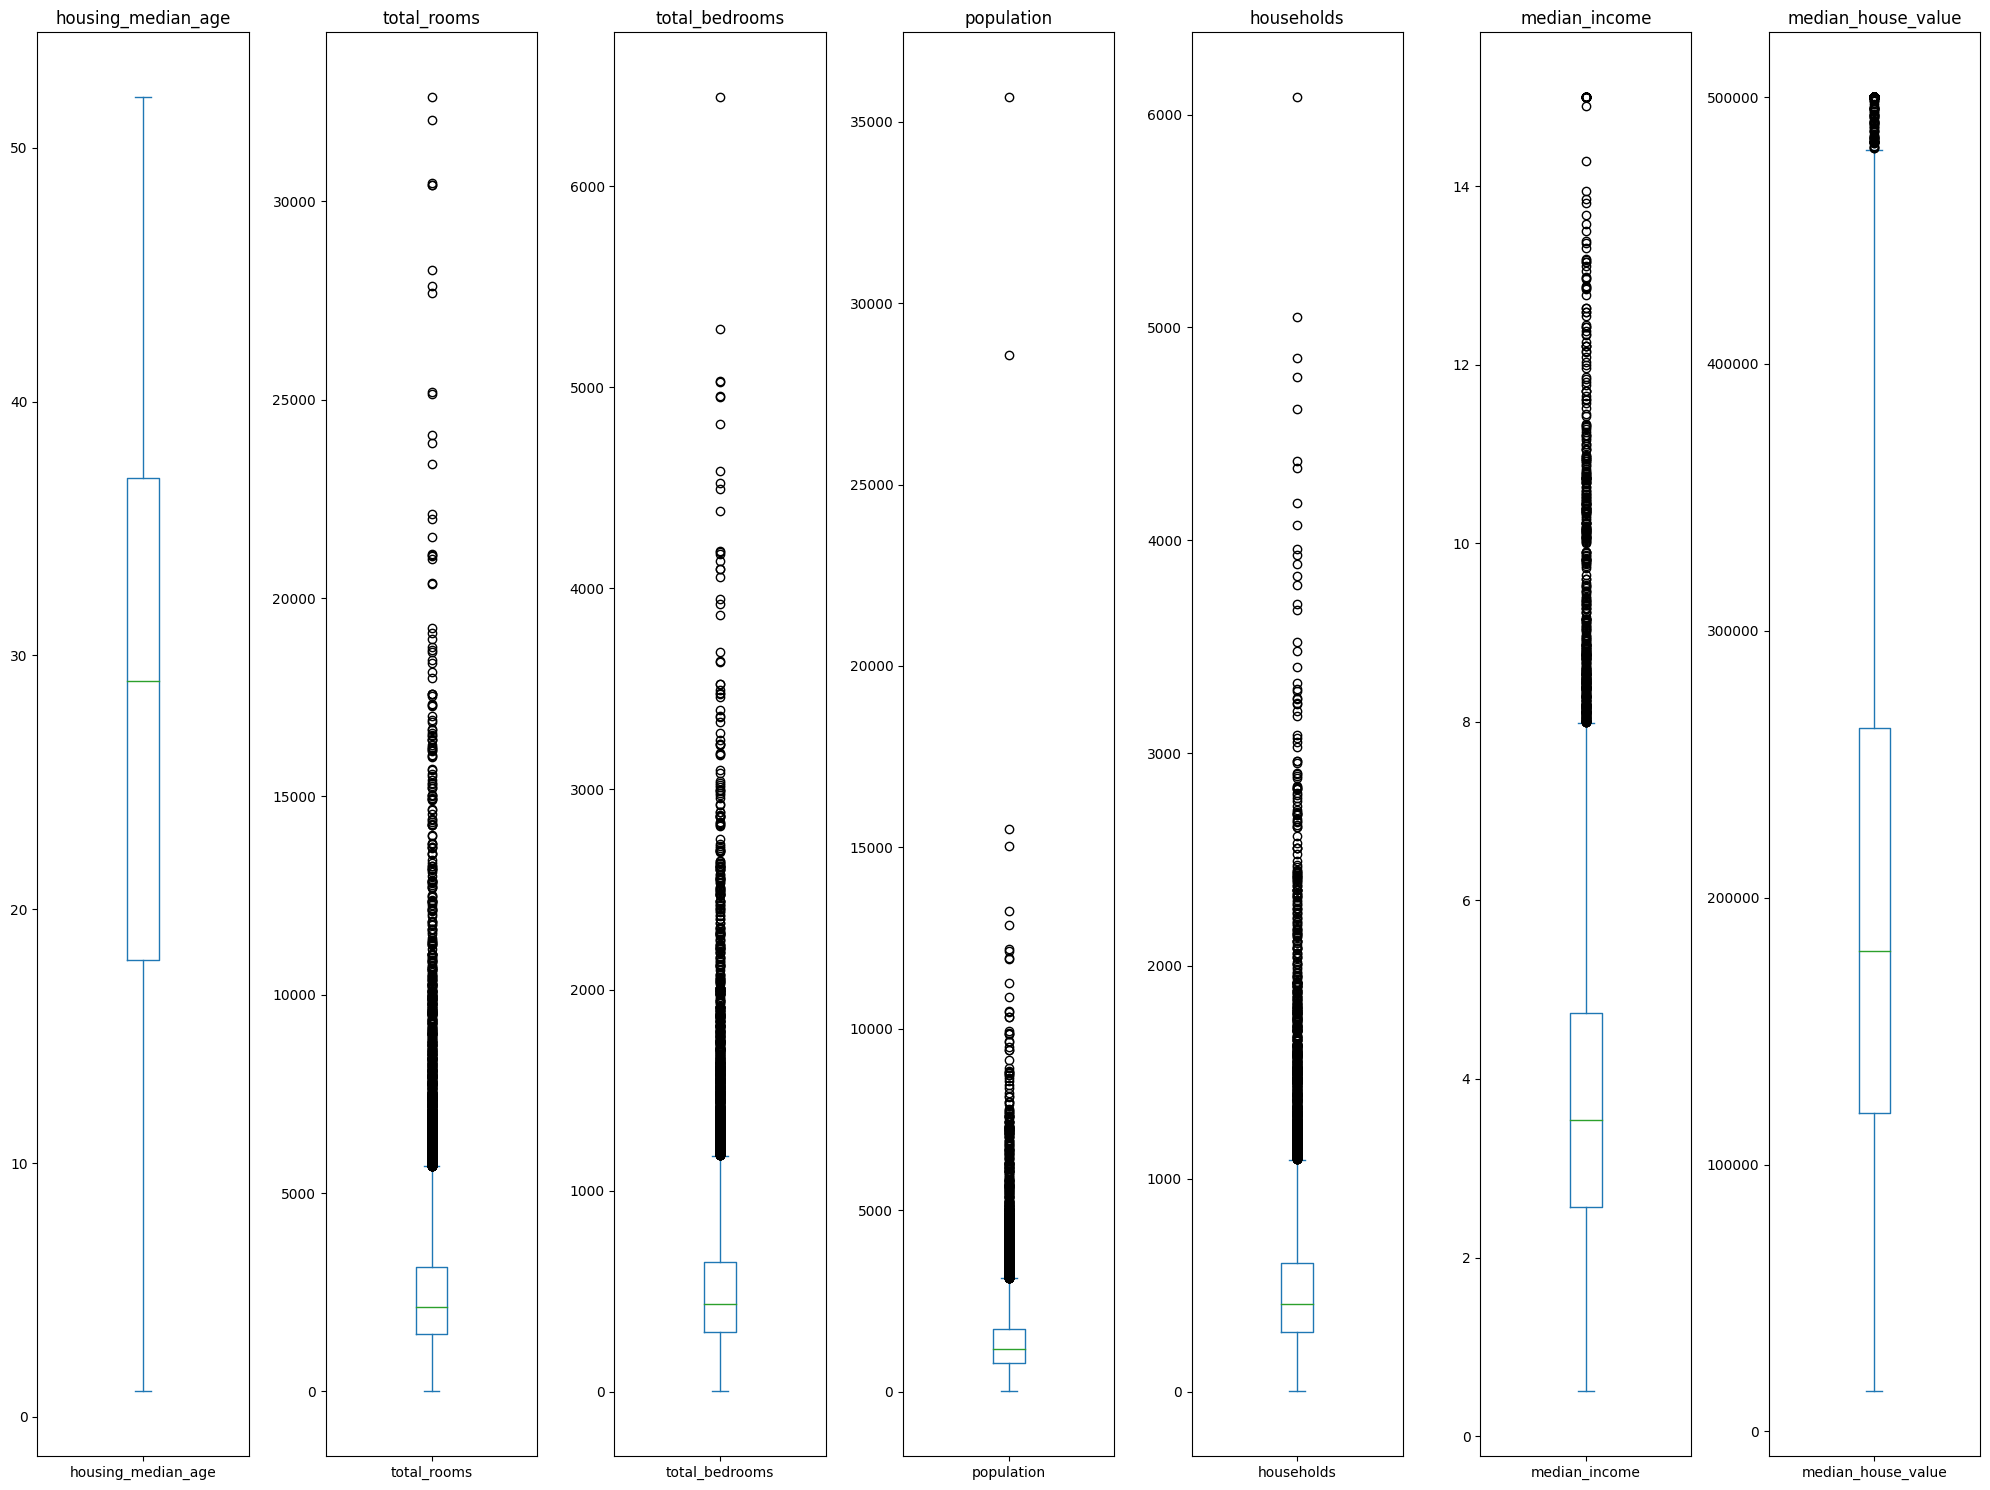

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(20, 15))

for i, column in enumerate(df.drop(columns=['longitude','latitude','ocean_proximity'])):
    df[column].plot.box(ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()


Dari boxplot atas dapat diketahui bahwa outlier kita terdapat disemua kategori kecuali housing median age dan median house value.
maka kita sekarang akan berburu outliers, mulai dari total rooms.

In [9]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [10]:
excluded_columns = ['longitude', 'latitude','ocean_proximity']  # List of columns to exclude
selected_columns = df.drop(excluded_columns, axis=1)



for column in selected_columns.columns:
    q1 = selected_columns[column].quantile(0.25)
    q3 = selected_columns[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Check for outliers
    outliers = selected_columns[(selected_columns[column] < lower_bound) | (selected_columns[column] > upper_bound)]

    print(f"Outliers di column '{column}': {((selected_columns[column] > upper_bound) | (selected_columns[column] < lower_bound)).sum()}")

    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")
    print("---")

Outliers di column 'housing_median_age': 0
Lower bound: -10.5
Upper bound: 65.5
---
Outliers di column 'total_rooms': 905
Lower bound: -1083.0
Upper bound: 5677.0
---
Outliers di column 'total_bedrooms': 879
Lower bound: -233.0
Upper bound: 1175.0
---
Outliers di column 'population': 822
Lower bound: -623.0
Upper bound: 3129.0
---
Outliers di column 'households': 836
Lower bound: -207.75
Upper bound: 1090.25
---
Outliers di column 'median_income': 477
Lower bound: -0.6806500000000009
Upper bound: 7.986150000000001
---
Outliers di column 'median_house_value': 751
Lower bound: -97125.0
Upper bound: 480275.0
---


Dari data atas, kita dapat bersimpulkan bahwa ada banyak column yang mempunya outliers, maka kita haris saring semua column per column

In [11]:
q1 = df['median_house_value'].quantile(0.25)
q3 = df['median_house_value'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_1 =df[(df['median_house_value'] <= 480275)]

# df[(df['median_house_value'] <= upper_bound)]
print(f"outliers yang tersisa: {(df_1['median_house_value'] > upper_bound).sum()}")
print(f"total data tersisa {df_1['median_house_value'].count()}")

#-------------------------
q1 = df['median_income'].quantile(0.25)
q3 = df['median_income'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_2 = df_1[(df['median_income'] <= upper_bound)]

print(f"outliers yang tersisa: {(df_2['median_income'] > upper_bound).sum()}")
print(f"total data tersisa {df_2['median_income'].count()}")
#-------------------------
q1 = df['households'].quantile(0.25)
q3 = df['households'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_3 = df_2[(df['households'] <= upper_bound)]

print(f"outliers yang tersisa: {(df_3['households'] > upper_bound).sum()}")
print(f"total data tersisa {df_3['households'].count()}")

#-------------------------
q1 = df['population'].quantile(0.25)
q3 = df['population'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_4 = df_3[(df['population'] <= upper_bound)]

print(f"outliers yang tersisa: {(df_4['population'] > upper_bound).sum()}")
print(f"total data tersisa {df_4['population'].count()}")
#-------------------------
q1 = df['total_bedrooms'].quantile(0.25)
q3 = df['total_bedrooms'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_5 = df_4[(df['total_bedrooms'] <= upper_bound)]

print(f"outliers yang tersisa: {(df_5['total_bedrooms'] > upper_bound).sum()}")
print(f"total data tersisa {df_5['total_bedrooms'].count()}")
#-------------------------
q1 = df['total_rooms'].quantile(0.25)
q3 = df['total_rooms'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_clean = df_5[(df['total_rooms'] <= upper_bound)]

print(f"outliers yang tersisa: {(df_clean['total_rooms'] > upper_bound).sum()}")
print(f"total data tersisa {df_clean['total_rooms'].count()}")

outliers yang tersisa: 0
total data tersisa 13560
outliers yang tersisa: 0
total data tersisa 13411
outliers yang tersisa: 0
total data tersisa 12631
outliers yang tersisa: 0
total data tersisa 12416
outliers yang tersisa: 0
total data tersisa 12341
outliers yang tersisa: 0
total data tersisa 12231


C:\Users\Steven\AppData\Local\Temp\ipykernel_3928\3318172683.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2 = df_1[(df['median_income'] <= upper_bound)]
C:\Users\Steven\AppData\Local\Temp\ipykernel_3928\3318172683.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_3 = df_2[(df['households'] <= upper_bound)]
C:\Users\Steven\AppData\Local\Temp\ipykernel_3928\3318172683.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_4 = df_3[(df['population'] <= upper_bound)]
C:\Users\Steven\AppData\Local\Temp\ipykernel_3928\3318172683.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_5 = df_4[(df['total_bedrooms'] <= upper_bound)]
C:\Users\Steven\AppData\Local\Temp\ipykernel_3928\3318172683.py:59: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_5[(df['total_rooms'] <= upper_bound)]


Sekarang kita akan mengecek kembali data yang sudah kita bersihkan

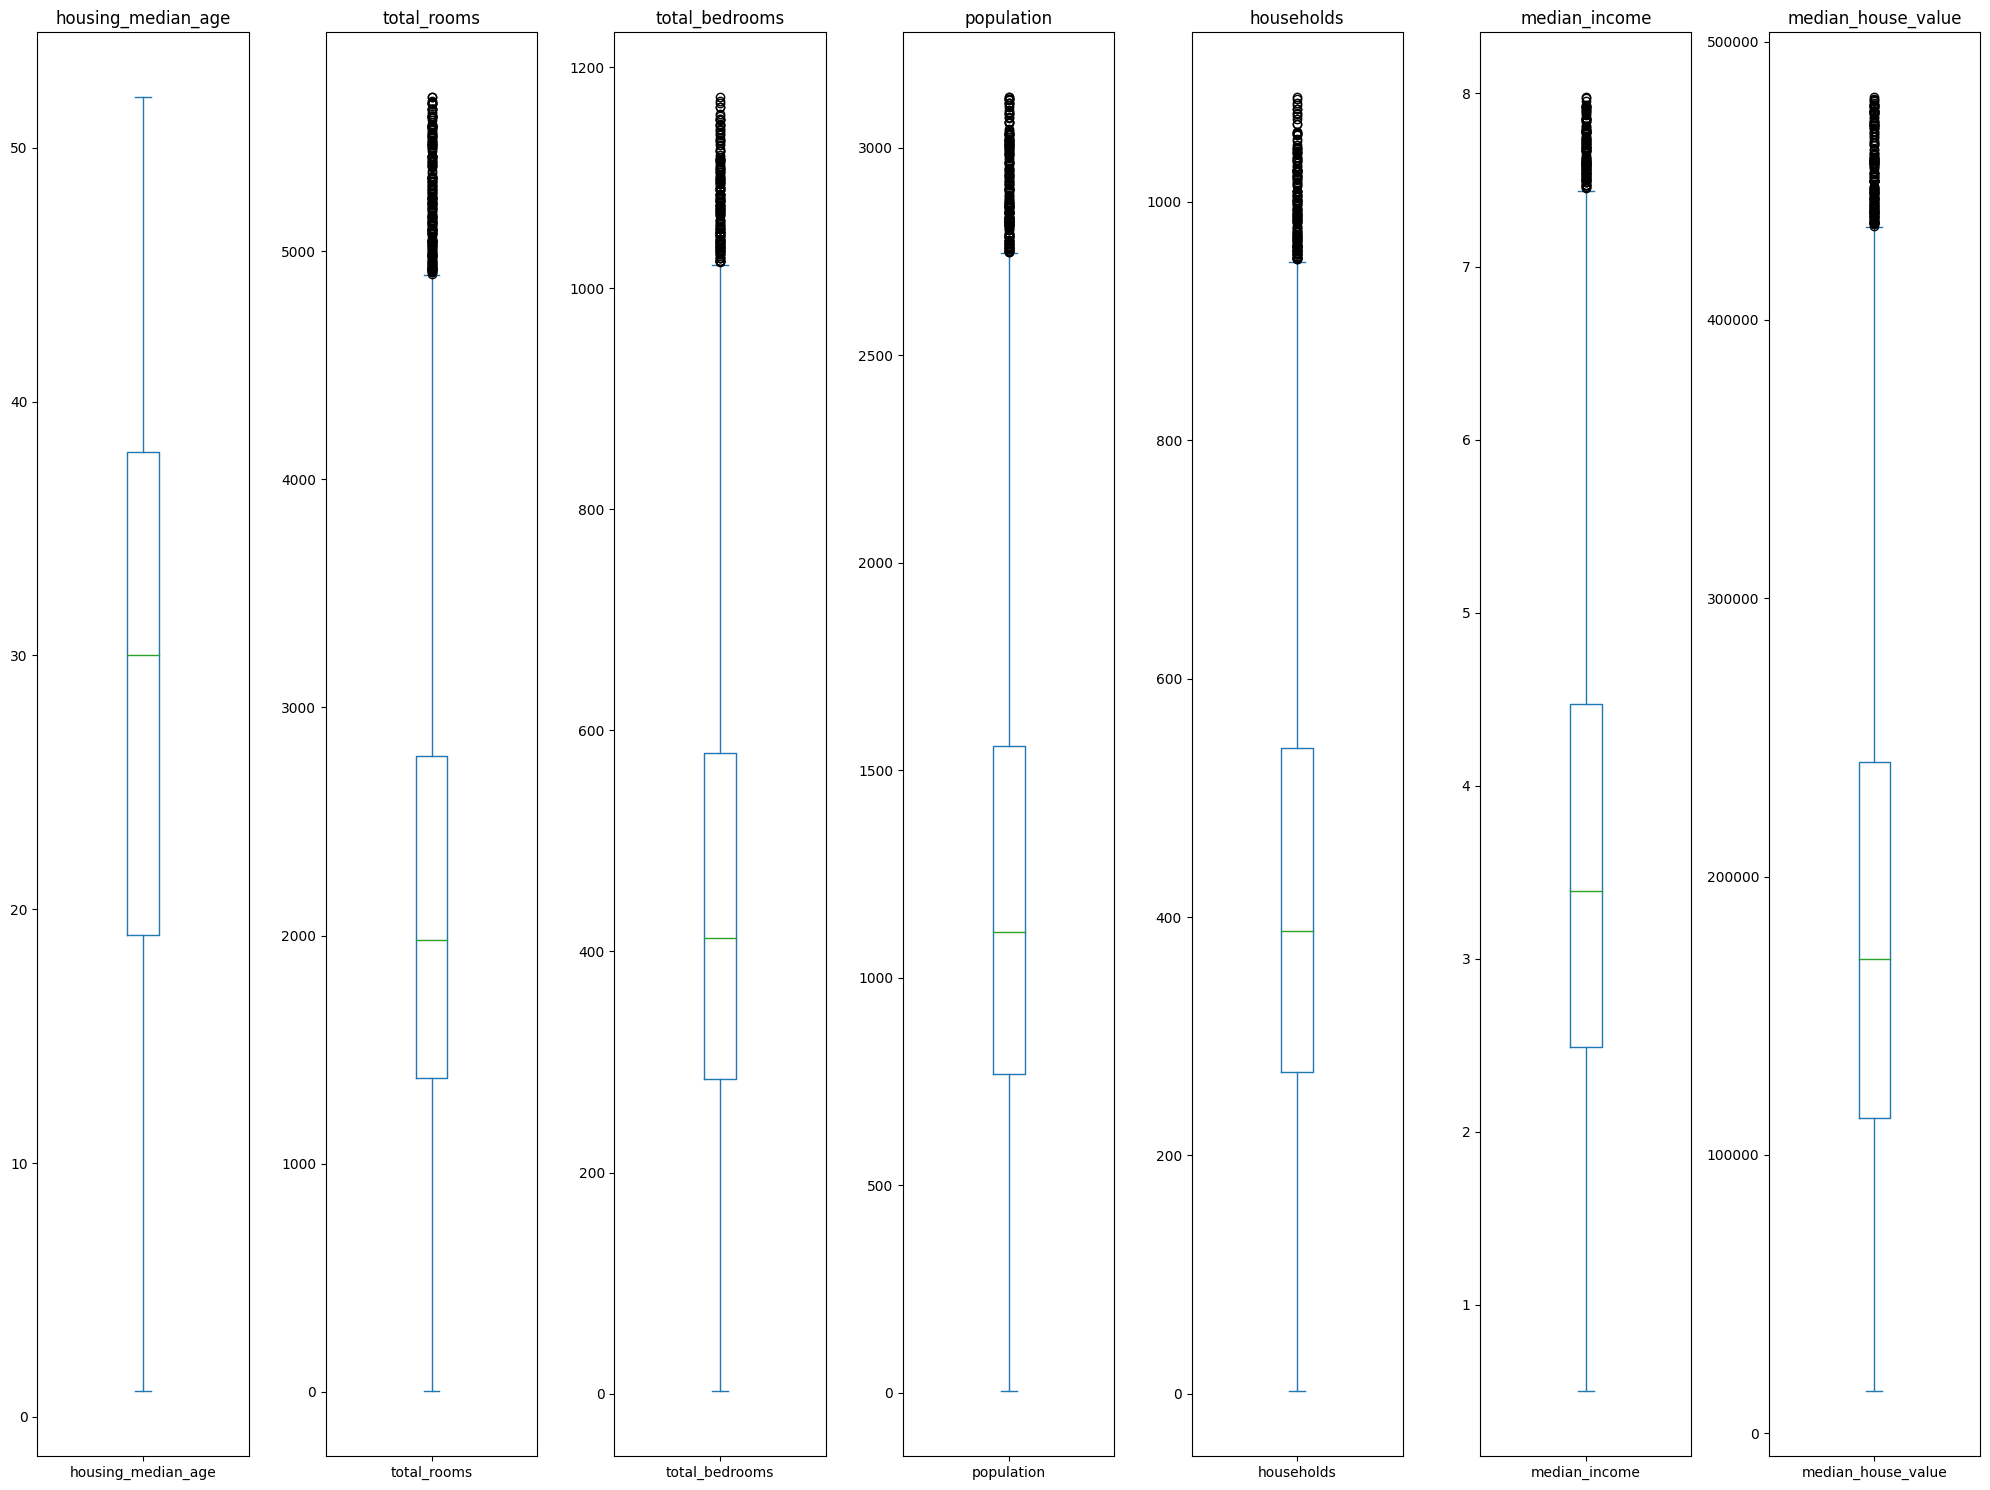

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(20, 15))

for i, column in enumerate(df_clean.drop(columns=['longitude','latitude','ocean_proximity'])):
    df_clean[column].plot.box(ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

Sekarang data numerik sudah bersih, selanjutnya Kita akan mengevaluasi Data Kategorikal yang ada di dataset kita

# **Data Kategorikal**

[Referensi peta California](https://www.nationsonline.org/oneworld/map/USA/california_map.htm)

Text(0.5, 1.0, 'Persebaran Rumah di California')

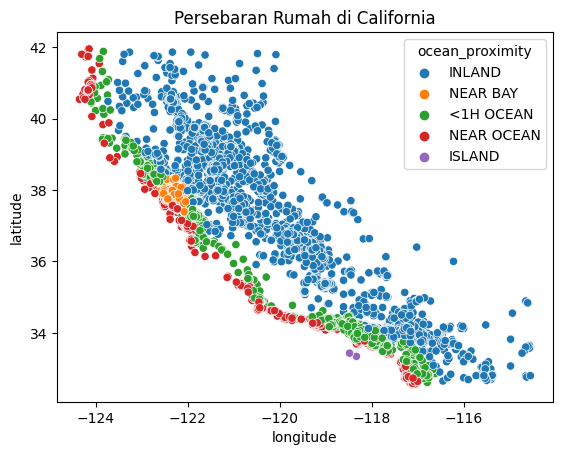

In [13]:
sea.scatterplot(data=df_clean, x=df_clean['longitude'], y=df_clean['latitude'], hue=df_clean['ocean_proximity'])

plt.title('Persebaran Rumah di California')

In [14]:
df_clean['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     5260
INLAND        4083
NEAR OCEAN    1545
NEAR BAY      1341
ISLAND           2
Name: count, dtype: int64

Dengan ini kita dapat mengetahui mayoritas persebaran rumah di california, dengan visualisasi peta dan jumlah angka, selanjutnya mari kita masukkan persebaran harga pada setiap kategori

Text(0.5, 1.0, 'Persebaran Harga Rumah di California')

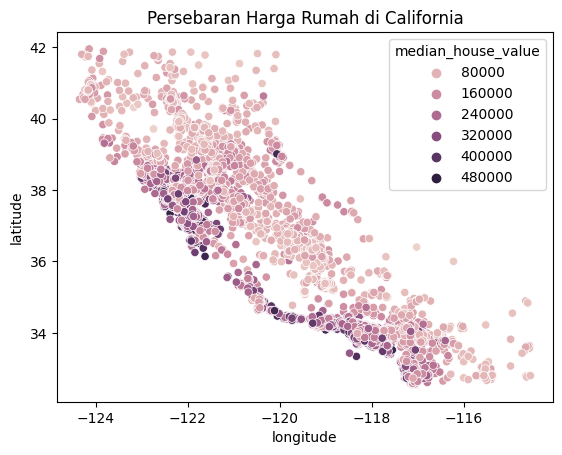

In [15]:
sea.scatterplot(data=df_clean, x=df_clean['longitude'], y=df_clean['latitude'], hue=df_clean['median_house_value'])

plt.title('Persebaran Harga Rumah di California')

In [16]:
grouped_median = df_clean['median_house_value'].groupby(df_clean['ocean_proximity']).median().reset_index()
grouped_median.sort_values('median_house_value',ascending=False)

,ocean_proximity,median_house_value
2,ISLAND,351100.0
4,NEAR OCEAN,212500.0
3,NEAR BAY,210300.0
0,<1H OCEAN,203700.0
1,INLAND,104000.0


Dengan data visualisasi dan penggambaran garis besar data diatas, kita dapat mengetahui bahwa persebaran harga rumah paling mahal berada didekat pantai (dengan beberapa anomali yang ada di daerah utara), dan paling mahal berada di kota Los Angeles dan San Francisco, yang tergolong masuk akal karena kepadatan penduduknya.

## **Modeling**

Sebelum kita dapat memasuki tahap machine learning, kita harus pertama-tama mengencode data kategorik kita menjadi data yang dapat dipakai oleh machine learning, `Ocean Proximity` memiliki 5 kategori maka dari itu kita dapa menggunakan `one hot encoding` saja.

untuk data numerik lainnya kita dapat menggunakan `scaling` data, dan kita akan memakai `Robust scaler` 

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [18]:
transform= ColumnTransformer(
    [
    ('Onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), ['ocean_proximity']),
    ('scaler', RobustScaler(), ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households',	'median_income']),
    ], remainder= 'passthrough'
)

transform

ColumnTransformer(remainder='passthrough',
                  transformers=[('Onehot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['ocean_proximity']),
                                ('scaler', RobustScaler(),
                                 ['housing_median_age', 'total_rooms',
                                  'total_bedrooms', 'population', 'households',
                                  'median_income'])])

**data splitting**

In [19]:
# bagi data dalam bentuk 80:20

x = df_clean.drop(columns=['median_house_value'], axis=1)
y = df_clean['median_house_value']

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.2,
    random_state = 0
)

Sekarang kita akan menguji model-model yang akan kita pakai, ada 8 model yang terdapat daftar dibawah

In [20]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge

import warnings
warnings.filterwarnings('ignore')

lr=LinearRegression()
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)
lasso = Lasso()
svr = SVR()
ker=KernelRidge()

models=[lr,knn,dt,rf,xgb,lasso,svr,ker]

rmse = []
rmse_mean = []
rmse_std = []

mae = []
mae_mean = []
mae_std= []

mape = []
mape_mean = []
mape_std = []


for i in models:
    estimator= Pipeline([
        ('preprocessing', transform),
        ('scaler', RobustScaler()),
        ('model', i)
    ])

    crossval_rmse = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=5, 
        scoring='neg_root_mean_squared_error'
        )
    
    rmse.append(crossval_rmse)
    rmse_mean.append(crossval_rmse.mean())
    rmse_std.append(crossval_rmse.std())

    crossval_mae = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=5, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )
    
    mae.append(crossval_mae)
    mae_mean.append(crossval_mae.mean())
    mae_std.append(crossval_mae.std())


    crossval_mape = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=5, 
        scoring='neg_mean_absolute_percentage_error'
        )
    
    mape.append(crossval_mape)
    mape_mean.append(crossval_mape.mean())
    mape_std.append(crossval_mape.std())
    
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor', 'Lasso Regressor', 'SVR', 'Kernel Ridge'],
    'rata-rata RMSE': rmse_mean,
    'rata-rata MAE': mae_mean,
    'rata-rata MAPE': mape_mean,
    'Std RMSE': rmse_std,
    'Std MAE': mae_std,
    'Std MAPE': mape_std
})

,Model,rata-rata RMSE,rata-rata MAE,rata-rata MAPE,Std RMSE,Std MAE,Std MAPE
0,Linear Regression,-57959.906233,-43334.676552,-0.274017,899.910974,756.965903,0.003212
1,KNN Regressor,-55788.918212,-39085.429182,-0.233201,1246.431173,865.820360,0.008795
2,DecisionTree Regressor,-64835.754773,-43664.821455,-0.259366,1971.958569,1399.750115,0.014054
3,RandomForest Regressor,-46383.955453,-31653.903935,-0.191735,801.763819,435.377562,0.008164
4,XGBoost Regressor,-44499.372234,-30310.084227,-0.183411,1152.105289,539.884254,0.005620
5,Lasso Regressor,-57959.892777,-43334.122280,-0.274006,900.061506,757.183921,0.003215
6,SVR,-94997.799476,-73747.762903,-0.502492,1180.101661,944.660336,0.013440
7,Kernel Ridge,-131066.118645,-102779.343125,-0.608499,844.722037,291.063080,0.008578


Dari Cross evaluation diatas, dapat dilihat dari rata-rata MAPE, MAE dan RMSE bahwa XGBoost dan Random Forest, maka kita akan fokus untuk menjalani 2 model tersebut.

Selanjutanya kita akan memakai 2 model tersebut kedalam Predict to test, predict to test secara singkat adalah testing model/prediksi model mana kalau dipakaikan kepada test set akan menghasilkan hasil terbaik.

**Hyperparameter Tuning**

In [21]:
import numpy as np

models= {
    'XGBoost': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

rmse=[]
mae=[]
mape=[]

for i in models:
    model = Pipeline([
        ('preprocessing', transform),
        ('scaler', RobustScaler()),
        ('model', models[i])
        ])

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae.append(mean_absolute_error(y_test, y_pred))
    mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_sblm= pd.DataFrame({'RMSE': rmse, 'MAE': mae, 'MAPE': mape}, index=models.keys())
score_sblm

,RMSE,MAE,MAPE
XGBoost,43320.877642,29302.918155,0.174195
RandomForest,45137.764439,30035.475574,0.178918


Setelah melakukan benchmarking, diketahui bahwa XGB mempunyai nilai yang lebih kecil errornya dibandingkan random forest, maka dari itu kita akan fokus untuk memakai XGB sebagai model utama kita

lebih lanjut xgboost seperti apa polanya dapat melihat [XGB](https://xgboost.readthedocs.io/en/stable/)

untuk selanjutnya kita harus mengetahui beberapa parameter penting yang paling optimal untuk model kita (kedalaman pohon, berapa gamma dan lainnya) maka kita akan memakai hyperparameter tuning dan mencari tahu

In [22]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

max_depth = list(np.arange(1, 11))
learning_rate = list(np.arange(1, 100)/100)
n_estimators = list(np.arange(100, 201))
subsample = list(np.arange(2, 10)/10)
gamma = list(np.arange(1, 11))
colsample_bytree = list(np.arange(1, 10)/10)
reg_alpha = list(np.logspace(-3, 1, 10)) 


hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transform),
        ('scaler', RobustScaler()),
        ('model', xgb)
        ])

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb,
    param_distributions = hyperparam_space_xgb, 
    n_iter = 100,
    cv = 5, 
    scoring = 'neg_root_mean_squared_error',
    n_jobs = -1,
    refit = True,
    random_state = 1  
)

random_xgb.fit(x_train, y_train)

print('XGBoost')
print('Best_score: \n', random_xgb.best_score_)
print('Best_params: \n', random_xgb.best_params_)

XGBoost
Best_score: 
 -43320.391293464505
Best_params: 
 {'model__subsample': 0.9, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 119, 'model__max_depth': 8, 'model__learning_rate': 0.05, 'model__gamma': 5, 'model__colsample_bytree': 0.8}


Sekarang kita sudah mengetahui parameter-parameter terbaik, maka kita akan memasukkannya kedalam model kita

In [23]:
xgb_tuned = random_xgb.best_estimator_
model={'XGB': XGBRegressor(random_state=1)}

xgb_tuned.fit(x_train, y_train)

y_pred_xgb_tuned = xgb_tuned.predict(x_test)

rmse_xgb_tuned = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuned))
mae_xgb_tuned = mean_absolute_error(y_test, y_pred_xgb_tuned)
mape_xgb_tuned = mean_absolute_percentage_error(y_test, y_pred_xgb_tuned)

score_after = pd.DataFrame({'RMSE': rmse_xgb_tuned, 'MAE': mae_xgb_tuned, 'MAPE': mape_xgb_tuned}, index=model.keys())
score_after

,RMSE,MAE,MAPE
XGB,42869.141507,28848.770028,0.17231


In [24]:
xgb_sblm = pd.DataFrame(score_sblm.loc['XGBoost']).T

print('Sebelum Tuning: \n')
display(xgb_sblm)
print('Sesudah Tuning: \n')
display(score_after)


Sebelum Tuning: 



,RMSE,MAE,MAPE
XGBoost,43320.877642,29302.918155,0.174195


Sesudah Tuning: 



,RMSE,MAE,MAPE
XGB,42869.141507,28848.770028,0.17231


Dapat dilihat kita sudah meningkatkan performa model kita dengan hypertuning, sekarang kita akan memasukkan hasil prediksi dan aktual kedalam grafik untuk melihat akurasi model kita:

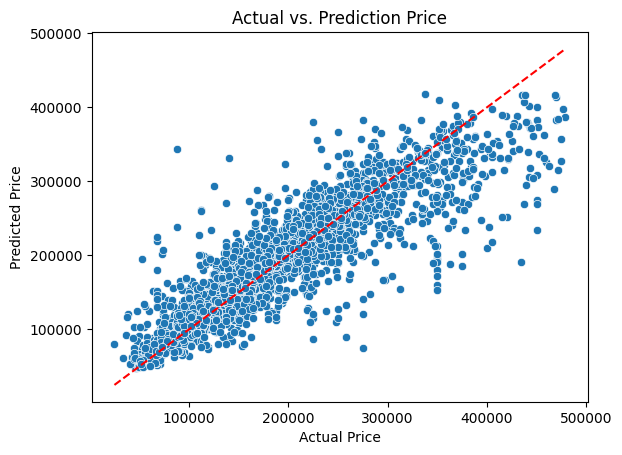

In [25]:
sea.scatterplot(x=y_test, y=y_pred_xgb_tuned)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.title('Actual vs. Prediction Price')
plt.xlabel('Actual Price' )
plt.ylabel('Predicted Price')

plt.show()

In [26]:
harga = pd.DataFrame({'Predicted price': y_pred_xgb_tuned, 'Actual Price': y_test})
harga[harga['Predicted price']<=350000]

# print((y_pred_xgb_tuned.mean())/(y_test.mean()))

,Predicted price,Actual Price
10587,262860.093750,371700.0
526,47628.691406,46800.0
13495,64902.183594,68500.0
6259,201075.171875,189600.0
1226,169988.375000,166400.0
...,...,...
6685,104121.671875,102400.0
8238,75343.835938,55600.0
2503,243207.984375,166300.0
8466,119620.570312,90400.0


Dari grafik diatas, dapat diketahui untuk secara garis besar, model kita sudah lumayan bisa memprediksi harga hingga kurang lebih 350,000 USD, yang dimana akurasinya bisa dikatakan mulai menurun. Tentu saja beberapa faktor dapat mempengaruhi hal tersebut, mulai dari pemilihan model yang kurang baik, hingga faktor lain yang tidak dicatat dalam data (dekat dengan rumah sakit, sekolah, pusat pembelanjaan dan lain-lainnya)

Selanjutnya kita akan mencari tahu faktor apa saja yang paling menentukan harga tinggi

In [28]:
pd.Series(xgb_tuned['model'].feature_importances_, transform.get_feature_names_out()).sort_values(ascending = False)

Onehot__ocean_proximity_INLAND        0.568347
scaler__median_income                 0.190020
remainder__longitude                  0.049022
remainder__latitude                   0.043021
Onehot__ocean_proximity_NEAR OCEAN    0.034397
Onehot__ocean_proximity_NEAR BAY      0.028043
scaler__housing_median_age            0.021325
scaler__population                    0.019524
scaler__households                    0.015852
scaler__total_rooms                   0.014040
scaler__total_bedrooms                0.013328
Onehot__ocean_proximity_ISLAND        0.003080
dtype: float32

Dari tabel atas, yang paling menentukan harga adalah dekat tidaknya rumah tersebut dengan pantai DAN tidak di kepulauan, hal ini termasuk mmasuk akal karena biasanya daerah pantai digemari pariwisata yang dapat dijadikan sumber sewa yang tetap, ataupun faktor dimana dekat dengan pantai udaranya paling segar, paling indah dan lainnya

# **Conclusion**

Dari model kita yang diatas dapat di simpulkan bahwa model kita secara garis besar dapat digunakan untuk memprediksi harga yang dibawah 350,000 USD, namun ada beberapa hal yang harus diperhatikan untuk ketepatan data yang harus diperhatikan:

- data yang diberikan adalah pada tahun 1990, yang dimana sudah outdated sekali karena sudah berjangka 30 tahun
- data yang diberikan kurang komplit karena tidak ada jarak antara fasilitas penting seperti Rumah Sakit dan lainnya
- jika data ini ingin dipakai untuk melihat perkembangan harga properti di California, akan lebih bagus lagi jika ada rekor data dari tahun ke tahun

# **Recomendation**

- Pengambilan data yang paling up to date untuk analisa yang lebih tepat
- Penambahan faktor-faktor lain seperti jarak antar rumah dan fasilitas penting
- tergantung dari stackholder, kalau ingin mengontrol harga properti (pemerintah), data yang dapat ditambah berupa: rata-rata dan median penghasilan warga California, Angka Kriminalitas, rata-rata jumlah properti yang dimiliki dan seterusnya
- kalau stackholdernya adalah agen properti yang ingin menjual propertinya pada tahun 1991, jika lokasinya berada didekat pantai dan bukan di kepulauan kecil California, maka harga anda biasanya dapat melebihi rata-rata yang ada di pasar
- kalau stackholdernya adalah pembeli properti yang hanya menginginkan rumah untuk tinggal, maka jauhilah pesisir pantai dan semakin ke utara semakin bagus